In [1]:
"""
   @script-author : Josmi Agnes Jose
   @script-discription: The Sparks Internship : Task 2
   @python-version: python  -3.8.3
   
"""

<br>
<font size="6" color="white"><div align="center">Prediction using Unsupervised ML</div></font>
<br>

<br>
<font size="5" color="white"><div align="center">Task : From the "Iris" dataset, predict the optimum number of clusters and represent it visually.</div></font>
<br>

<font size="4" color="white">Importing libraries</font>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

<font size="4" color="white">Loading and understanding the Dataset.</font>

In [32]:
df=pd.read_csv("task2.csv")

In [33]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
var=df.columns
print("Features: ", df.columns)
print("Clusters :",df["Species"].unique())


Features:  Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Clusters : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


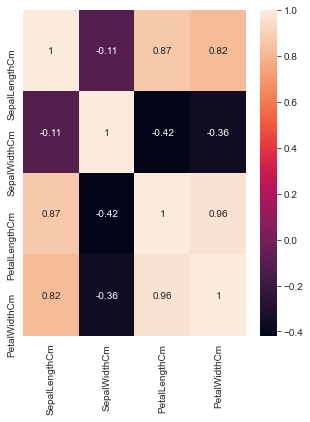

In [44]:
plt.figure(figsize=(5,6))
sns.set_style("whitegrid")
data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
ax = sns.heatmap(data.corr(), annot=True)

<br>

* There are no missing values in our dataset.

* There are four feature variables in our dataset: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'.

* The datapoints belongs to three clusters :'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

* We do not need the 'Id'and "Species" columns for our clustering.

* High correlation exists between PetalLength and PetalWidth.

<br>

<br>
<font size="6" color="white">K-Means Clustering.</font>
<br>

In [38]:
X = df.iloc[:,1:5].values 

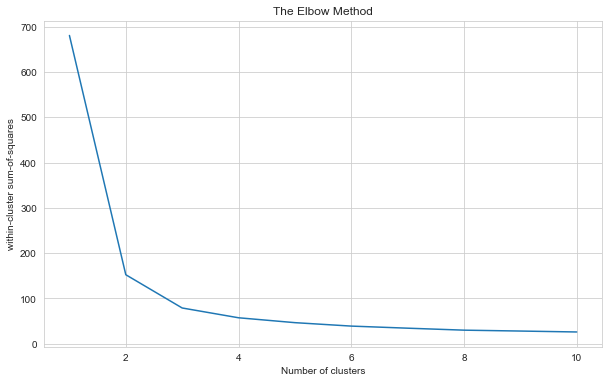

In [39]:
wcss = [] # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum-of-squares')
plt.show()

<br>

* Our task is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

* When we plot the WCSS with the K value, the plot looks like an Elbow.

* When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

* In the above graph we can see that the optimal number of clusters is 3.

<br>

In [40]:
# Training the K-means model on the dataset
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_3.fit_predict(X) 

In [41]:
print(y_kmeans)
print(y_kmeans.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)


<br>

* The fit_predict() method has predicted the clusters to which each instance in X belongs.

* y_kmeans contains the cluster to which the 150 instances belongs. We can see that there are 3 values: "0" ,"1" ,"2"  which corresponds to the 3 different clusters in the dataset.

<br>


<br>
<font size="6" color="white">Visualising the results.</font>
<br>

Visualising Clusters of Iris dataset taking 2 features at a time.


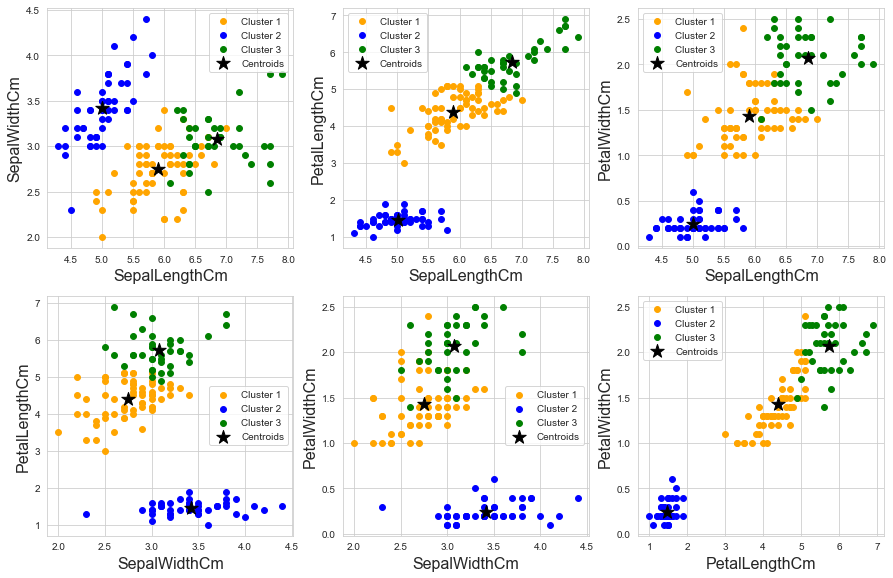

In [42]:
print('Visualising Clusters of Iris dataset taking 2 features at a time.')
count=1
plt.subplots(figsize=(15, 15))
for i in range(1,4):
    plt.subplot(3,3,count)
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, i], s = 35, c = 'orange', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, i], s = 35, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, i], s = 35, c = 'green', label = 'Cluster 3')
    plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, i],s = 200,marker="*", c = 'black', label = 'Centroids')
    plt.xlabel('SepalLengthCm',fontsize=16)
    plt.ylabel(df.columns[i+1],fontsize=16)
    plt.legend()
    count+=1
    
count=4
for i in range(2,4):
    plt.subplot(3,3,count)
    plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, i], s = 35, c = 'orange', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, i], s = 35, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, i], s = 35, c = 'green', label = 'Cluster 3')
    plt.scatter(kmeans_3.cluster_centers_[:, 1], kmeans_3.cluster_centers_[:, i], s = 200,marker="*", c = 'black', label = 'Centroids')
    plt.xlabel('SepalWidthCm',fontsize=16)
    plt.ylabel(df.columns[i+1],fontsize=16)
    plt.legend()
    count+=1

plt.subplot(3,3,6)
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 35, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 35, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 35, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 2], kmeans_3.cluster_centers_[:, 3],s = 200,marker="*", c = 'black', label = 'Centroids')
plt.xlabel('PetalLengthCm',fontsize=16)
plt.ylabel('PetalWidthCm',fontsize=16)
plt.legend()
plt.show()

<br>

* In the above graph the clusters predicted by our algorithm are represented graphically selecting 2 features at a time.

* The 3 clusters are represented by the 3 colours (Blue,Orange,Green).

* The below greaph is a pairplot which is hued based on the species given in the orginal dataset.

* We can see that both graphs looks similar while considering the respective variable pairs.

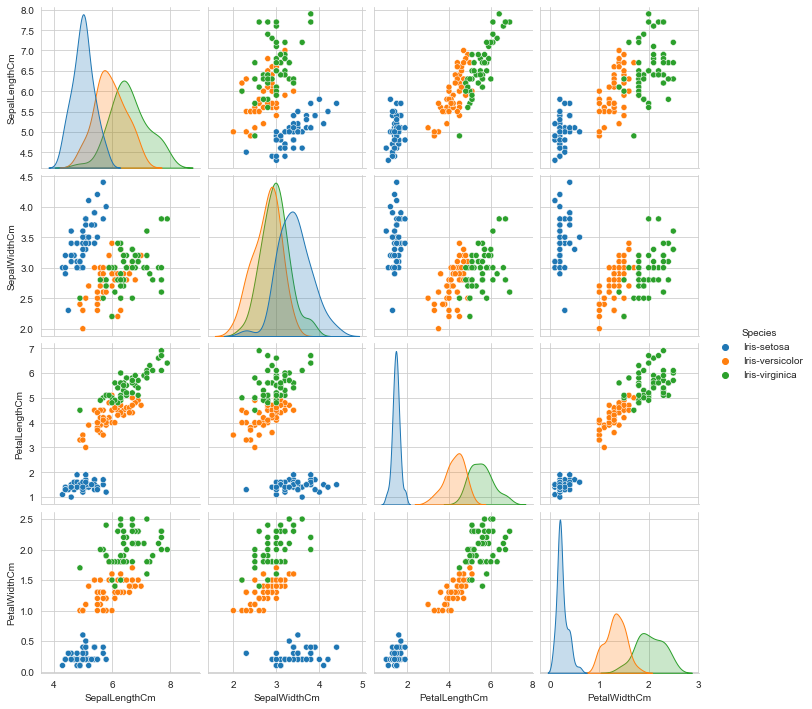

In [43]:
df=df.drop(['Id'], axis=1)
sns.pairplot(df, hue="Species")